In [142]:
from os import listdir
from os.path import isfile, join


#apk_path = 'APKs'
apk_path = '6test'
#sesName = apk_path + ".ag"
useSes = True

apks = []
for f in listdir(apk_path):
    if isfile(join(apk_path, f)) and f.endswith(".apk"):
        full = './' + apk_path + '/' + f
        apks.append(full)
        print("added: " + full)  
        

#apks = [f for f in listdir(apk_path) if (isfile(join(apk_path, f)) and f.endswith(".apk"))]

print("number apk's found: ", len(apks))

added: ./6test/pos_agency.contra.apps.kpmg.kpmgglobalevent.apk
added: ./6test/pos_air.air.lyl.ThreeKingdomsFT.apk
number apk's found:  2


In [143]:
from androguard import misc
from androguard import session
from os import listdir
from os.path import isfile, join

if useSes:
    s = misc.get_default_session()
    for apk in apks:    
        digest = s.add(apk)
        print("analysed: " + apk)
else:
    print("not using session analysis cache");


Requested API Level could not be found, using 10 instead


analysed: ./6test/pos_agency.contra.apps.kpmg.kpmgglobalevent.apk
analysed: ./6test/pos_air.air.lyl.ThreeKingdomsFT.apk


In [155]:
from androguard.core.analysis.analysis import ExternalMethod

def analyseMethod(ma, level=0):    
    print(repr(ma))
    for pca, pm, offset in ma.get_xref_from(): #(ClassAnalysis, EncodedMethod or ExternalMethod, int
        #print(repr(ma.get_xref_from()))
        #isExtMethod = isinstance(pm, ExternalMethod)    
        #str = isExtMethod ? "ext-method" : "non-ext-meth"
        print("L{} Call from {} => {}:{}".format(level, pca.name, pm.name, offset))
        print(repr(pm))        
        #if(False): #doesnt work
        #    analyseMethod(pm,level+1) 

for apk in apks:
    print("*** " + apk + "\n")
    if(useSes):
        a, d, dx = s.get_objects_apk(filename = apk)
    else:
        a, d, dx = misc.AnalyzeAPK(apk)        
        
    #for ma in dx.find_methods(classname="Landroid/webkit/WebSettings;", methodname='setUserAgentString'):
    for ma in dx.find_methods(methodname='setUserAgentString'):
        analyseMethod(ma)    
    print("*** end \n")
    

    

*** ./6test/pos_agency.contra.apps.kpmg.kpmgglobalevent.apk

<analysis.MethodClassAnalysis Lorg/xwalk/core/XWalkSettings;->setUserAgentString(Ljava/lang/String;)V [access_flags=public] @ 0x1ab50c>
<analysis.MethodClassAnalysis Lorg/xwalk/core/XWalkView;->setUserAgentString(Ljava/lang/String;)V [access_flags=public] @ 0x1b15b0>
<analysis.MethodClassAnalysis Lorg/xwalk/core/internal/XWalkSettingsInternal;->setUserAgentString(Ljava/lang/String;)V [access_flags=public] @ 0x1bced8>
L0 Call from Lorg/xwalk/core/internal/XWalkViewInternal; => setUserAgentString:20
L0 Call from Lorg/xwalk/core/internal/XWalkSettingsBridge; => setUserAgentStringSuper:20
L0 Call from Lorg/xwalk/core/internal/XWalkSettingsBridge; => setUserAgentStringSuper:8
<analysis.MethodClassAnalysis Lorg/xwalk/core/internal/XWalkViewInternal;->setUserAgentString(Ljava/lang/String;)V [access_flags=public] @ 0x1bfbb8>
L0 Call from Lorg/xwalk/core/internal/XWalkViewBridge; => setUserAgentStringSuper:0
<analysis.MethodClassAnaly

Name: ./6test/pos_agency.contra.apps.kpmg.kpmgglobalevent.apk
Type: DiGraph
Number of nodes: 22
Number of edges: 22
Average in degree:   1.0000
Average out degree:   1.0000

Name: ./6test/pos_air.air.lyl.ThreeKingdomsFT.apk
Type: DiGraph
Number of nodes: 3
Number of edges: 2
Average in degree:   0.6667
Average out degree:   0.6667



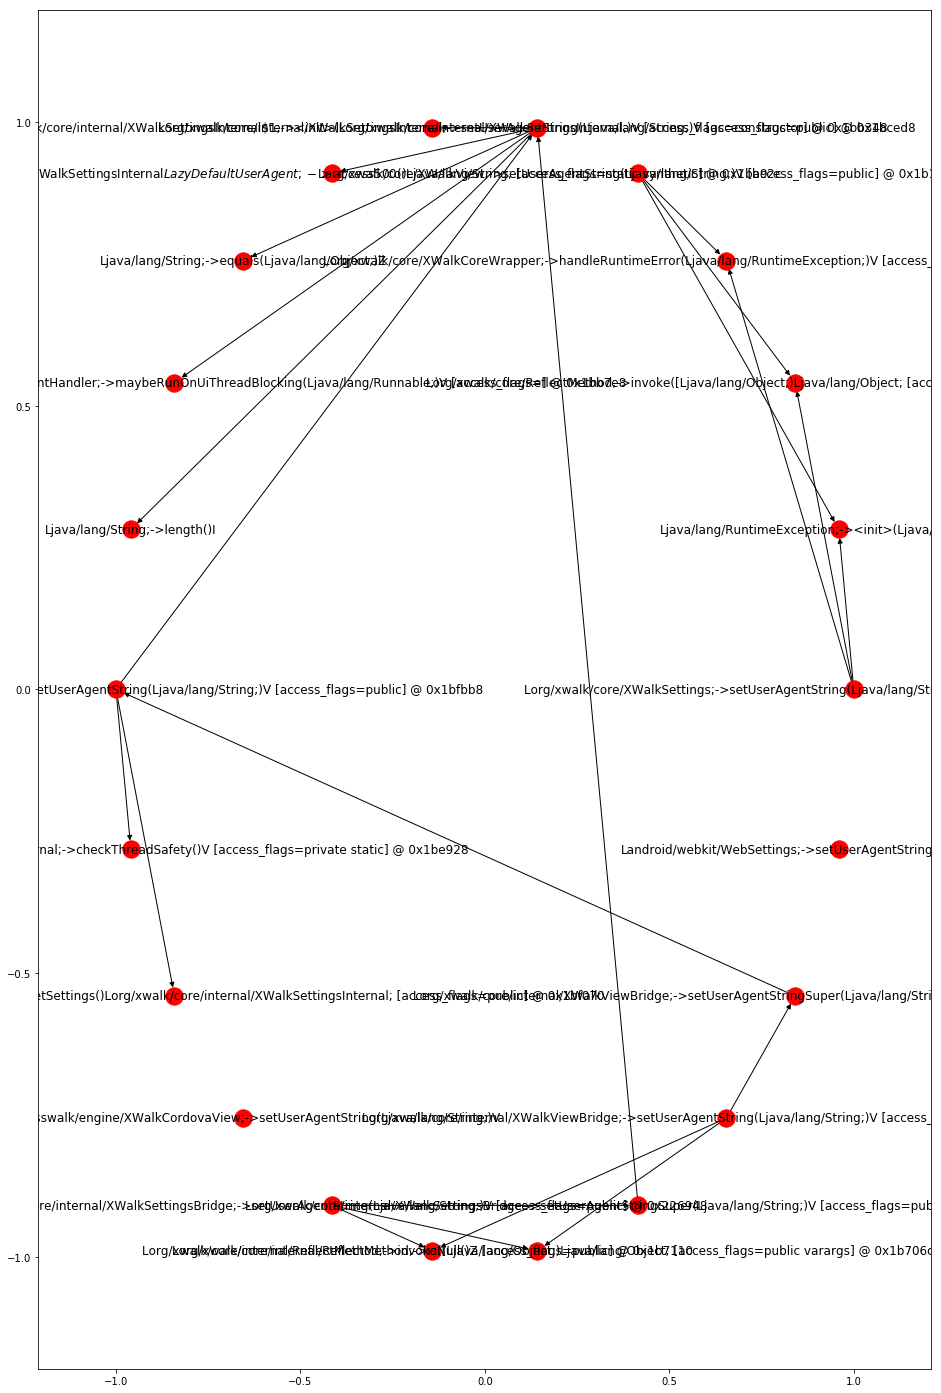

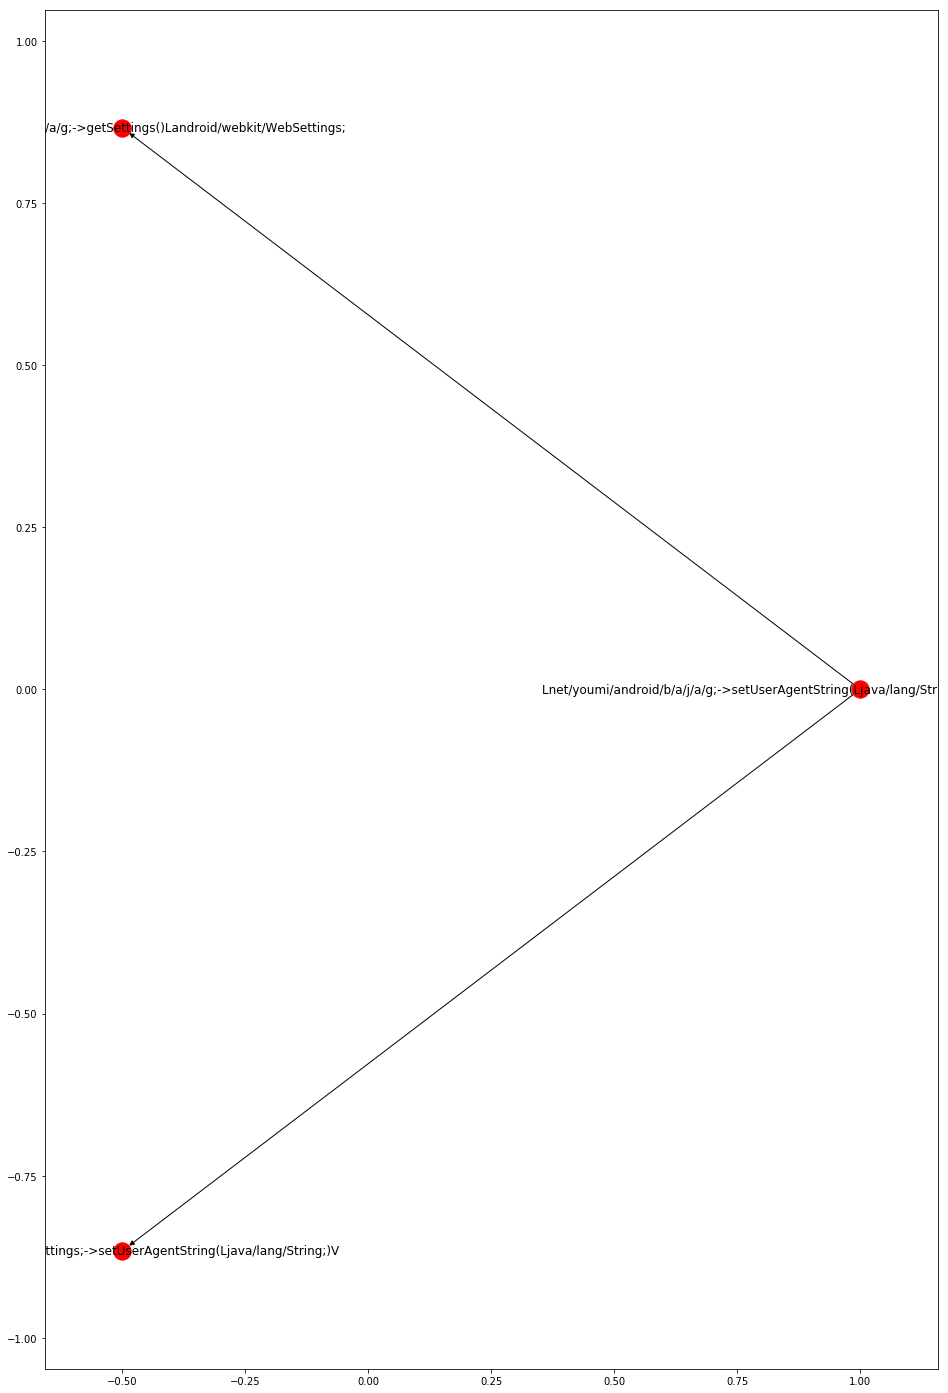

In [174]:
from networkx import nx
from networkx import MultiDiGraph
import matplotlib.pyplot as plt

 
cnt = 0
for apk in apks:
    cnt+=1
    if(useSes):
        a, d, dx = s.get_objects_apk(filename = apk)
    else:
        a, d, dx = misc.AnalyzeAPK(apk)        
    cg = dx.get_call_graph(methodname='setUserAgentString')
    #cg = dx.get_call_graph(methodname='set*')
    cg.name = apk
    print(nx.info(cg) + "\n")
    pos = nx.shell_layout(cg) # circular_layout random_layout shell_layout spring_layout spectral_layout
    plt.figure(cnt, figsize=(16, 25))
    nx.draw_networkx(cg, pos)     
    
    
plt.show()    

    
#    for ma in dx.find_methods(classname="Landroid/webkit/WebSettings;", methodname='setUserAgentString'):                        
#        m = ma.get_method() #  m:ExternalMethod, ma: MethodClassAnalysis,
        #cg = m.get_call_graph()
  
    
    
        
           

